## Importing Libraries

In [1]:
#importing required libraries

import cv2
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread

In [2]:
# importing model using joblib

model = joblib.load('model/SVM_model')

## Testing on Images

In [3]:
# function for letter prediction on images

def Image_Classifier(location):
    try:
        img = imread(location)
        # reading image from given location
        
        image= cv2.resize(img,(28,28))
        # resized image inti (28,28)
        
        img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # converting image into grayscale
        
        img_gray= img_gray/255
        # data transformation
        
        img_gray= img_gray.reshape(1,-1)
        # reshaoing image for testing purpose
        
        result=chr(ord('A')+model.predict(img_gray)[0])
        # store result into "result" variable
        
        print("Predicted Class is : ",result)
        # printing label 
        
        plt.figure(figsize =(10,10))
        # fixing figure size into (10,10)
        
        # plotting subplot 
        plt.subplot(1,2,1)
        plt.title("Original Image")
        plt.imshow(img)
        plt.axis(False)

        # plotting subplot 
        plt.subplot(1,2,2)
        plt.title("GrayScale Image (For Testing)")
        plt.imshow(img_gray.reshape(28,28))
        plt.axis(False)
        
        
    except:
        print("Oops!!! Image is not loaded...")


Predicted Class is :  W


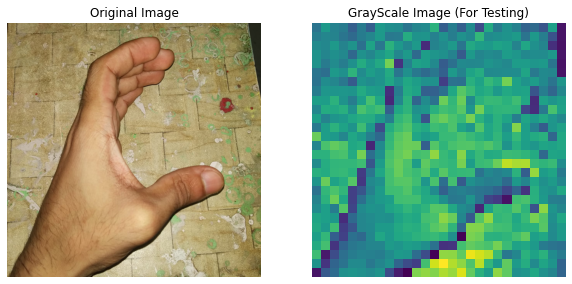

In [4]:
Image_Classifier("images/test1.jpeg")

Predicted Class is :  A


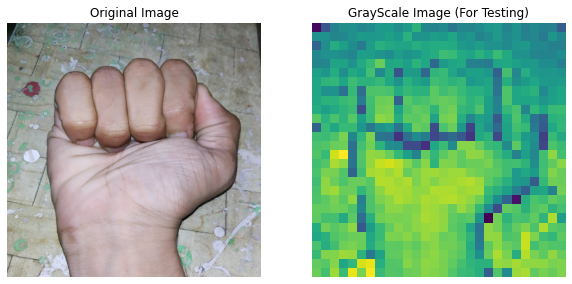

In [5]:
Image_Classifier("images/test2.jpeg")

### Conclusion:
 Successfully predict label for given images .

## Testing on Video

In [6]:
# class for predict letter in video

class VideoClassification:
    
    def __init__(self,url):
        self.url = url
        self.result=""
        self.model = joblib.load('model/SVM_model')
        self.cam = cv2.VideoCapture(self.url)
        self.videoCapture()
        
    
    def videoCapture(self):
        upper_left = (50, 50)
        bottom_right = (350, 350)
        cv2.namedWindow("Sign Classifier", cv2.WINDOW_NORMAL)
        while True:
            camera , image = self.cam.read()

            r = cv2.rectangle(image,upper_left, bottom_right, (250, 0, 0), 5)
            rect_img = image[upper_left[1] : bottom_right[1], upper_left[0] : bottom_right[0]]

            sketcher_rect = self.sketch_transform(rect_img)
            #Conversion for 3 channels to put back on original image (streaming)
            sketcher_rect_rgb = cv2.cvtColor(sketcher_rect, cv2.COLOR_GRAY2RGB)

            #Replacing the sketched image on Region of Interest
            image[upper_left[1] : bottom_right[1], upper_left[0] : bottom_right[0]] = sketcher_rect_rgb

                
            if camera:
                self.predictClass(rect_img)
                image_Reshaped = cv2.resize(image, (600, 500)) 
                image = cv2.putText(image_Reshaped, "Label : "+self.result, (15, 35),cv2.FONT_HERSHEY_SIMPLEX,
                                    0.8, (0, 0, 255), 2, cv2.LINE_AA)
                cv2.imshow("Sign Classifier", image)
            else:
                print("Oops!!! Unable to access camera...")
                break
                
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    
    
    def predictClass(self,frame):
        if frame is not None:
            image= cv2.resize(frame,(28,28))
            # resize frame into (28,28)
            img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            img_gray= img_gray/255
            img_gray= img_gray.reshape(1,-1)
            self.result=chr(ord('A')+self.model.predict(img_gray)[0])
            
            
    def sketch_transform(self,image):
        image_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image_grayscale_blurred = cv2.GaussianBlur(image_grayscale, (7,7), 0)
        image_canny = cv2.Canny(image_grayscale_blurred, 10, 80)
        _, mask = image_canny_inverted = cv2.threshold(image_canny, 30, 255, cv2.THRESH_BINARY_INV)
        return mask

    
    def __del__(self):
        self.cam.release()
        cv2.destroyAllWindows()


In [7]:
url = "http://192.168.43.1:8080/video"
obj = VideoClassification(url)
del obj

### Conclusion:
 Successfully predict label for live video capture.